<a href="https://colab.research.google.com/github/sauravkumar19/Hotel_booking_data_analysis/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<b>HOTEL BOOKING ANALYSIS<b>

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

##We are using the following libraries:
- Numpy: We will use numpy arrays as they are comparitively faster than lists, also columns of dataframes behaves as numpy arrays

- Pandas: for reading the data from csv file, for data clening and for preparing data for analysis

- matplotlib,seabors: for different visualisations, for drawing conclusions from data and for exploratory data analysis. 

In [5]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading CSV file from google drive in colab enviroment
We will first load our csv file in which data is stored to the colab enviroment in data frame format so that we can perform the required cleaning and analysis.



In [6]:
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/My Drive/AlmaBetter_Capstone_projects/Capstone_project1_eda/Hotel Bookings.csv"
hotels_original=pd.read_csv(path)
hotels=hotels_original.copy()
type(hotels)  #the type of hotels if of pandas dataframe type

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pandas.core.frame.DataFrame

In [7]:
#first five columns of data to have a general view how the data looks like.
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#DATA DESCRIPTION

The data set is a combination of different types of variables among which some are categorical variables and the others are discrete variables.

To make required analysis from the given raw data we have to perform following steps:

**step1 [Understanding the data deeply]**: Read the data thoroughly and understand the connections between different attributes

**step2 [Data Cleaning]**: This data is raw data so it contains lot of noise and null values so we  have to remove it for proper analysis with minimum or no error.

**step3 [Analysing and Concluding]**: After data cleaing, data is ready for further analysis, so we make required analysis and visulisation for various attributes of data and for required combinations of attributes of data.




##Details of data

In [8]:
hotels.info() #information about all the attribute present in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotels.describe(include = ['object']) #a brief description of all the categorical variables
"""
from this we can make conclusions like
- city hotels are preferred over resort hotels
- Maximum customers arrives in august
- total number of meals available are 5
etc etc.....
"""

'\nfrom this we can make conclusions like\n- city hotels are preferred over resort hotels\n- Maximum customers arrives in august\n- total number of meals available are 5\netc etc.....\n'

##DATA CLEANING
For data cleaning:

- We removed the duplicate rows.
- We remove rows and columns having more than 80% of entries unavailable(null).
- We replace the remaing null values with the best possible values.
- As in this data has some  continuous attributes so there is need to remove outliers.

Now after making required cleaning the data is ready for visualisation

In [10]:
print(f"shape of data before cleaning: {hotels.shape}")


shape of data before cleaning: (119390, 32)


In [11]:
#to print the percentage of null values in each column
null_percent=pd.Series()
for col in hotels.columns:
  null_percent[col]=((hotels.shape[0]-hotels[col].count())/(hotels.shape[0]))*100
print(null_percent)
#we note that only 4 attributes have null values and company have more than 90% of the values null.

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [12]:
#preserving columns having at least 20% of not null values
hotels.dropna(axis=1,inplace=True,thresh=(0.2*hotels.shape[0]))

#preserving rows having at least 20% of not null values
hotels.dropna(axis=0,inplace=True,thresh=(0.2*hotels.shape[1]))

#the columns named company and some rows will get deleted from the dataset.

In [13]:
# replacing Nan value from chidren and agent columns with 0
hotels['children'].fillna(0, inplace = True)   #we assume if the number of childrens are not available than there is a high probabilty that it is 0.
hotels['agent'].fillna(0, inplace = True)      #if agent id is not available we assume it to be 0 which means an intermediate agent is not involved.

In [14]:
# replacing Nan value of country column and consider that those countries are some other countries which are not of that much important
hotels['country'].fillna('other', inplace = True)      

In [15]:
hotels.drop_duplicates(inplace=True,ignore_index=True)

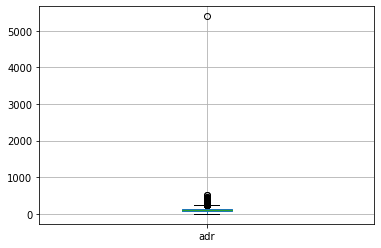

In [16]:
hotels[["adr"]].boxplot()

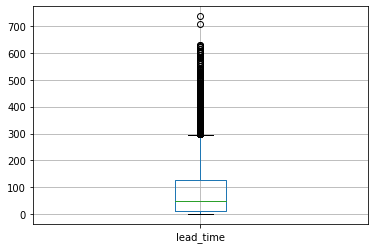

In [17]:
hotels[["lead_time"]].boxplot()

In [18]:
#removing outliers from adr and lead time column
continuous_columns=["lead_time","adr"]
for c in continuous_columns:
  Q1=np.quantile(hotels[c],0.25)
  Q3=np.quantile(hotels[c],0.75)
  IQR= Q3 - Q1
  upper=np.where(hotels[c]>=(Q3+1.5*IQR))
  #print(upper[0])
  lower=np.where(hotels[c]<=(Q1-1.5*IQR))    #it will be a tuple
  #print(lower)
  upper=np.unique(np.append(upper[0],lower[0]))
  hotels.index=np.arange(0,hotels.shape[0])
  hotels.drop(upper, inplace = True)      #we have indexed it to make it a nummmpy array

through boxplots we note that the outliers are removed now

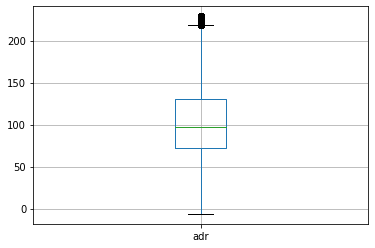

In [19]:
hotels[["adr"]].boxplot()

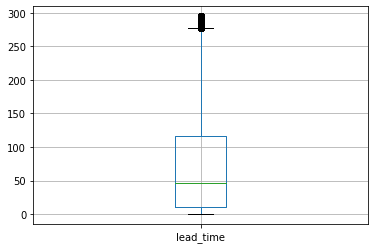

In [20]:
hotels[["lead_time"]].boxplot()

In [21]:
#null percentage after cleaning data
null_percentage = (hotels.isnull().sum()/len(hotels))*100
null_percentage

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [22]:
print(f"shape of data after cleaning: {hotels.shape}")

shape of data after cleaning: (82606, 31)


Feature Engineering
We add two new columns total_guest and day_stay in our given dataset

In [23]:
#adding columns total_guest and day_stay to hotel data set
hotels['total_guest'] = hotels['adults'] + hotels['children']
hotels['day_stay'] =hotels['stays_in_weekend_nights'] + hotels['stays_in_week_nights']

##EDA: (Exploratory Data Analysis)

- we selected an attribute, then check it's relation and dependencies of other attributes.
- Analyses it's division using pieplots
- Compare different categories of an attribute through bar graphs, histograms, line plot etc.
- We draw insights from those graphs which can prove beneficial for both hotels and customers

**TYPES OF HOTELS**
- There are two types of hotels in the given dataset: city hotels, resort hotels
- we will check which type of hotel have more demand
- For which hotel cancelation rate is more
- In what condition which type of hotels will be better to choose

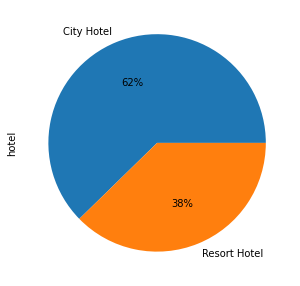

In [24]:
# which type of hotel book more
hotel_type = hotels['hotel'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**Inference**

Peoples prefer city hotels over resort hotels

In [25]:
#In which month, hotel booking is maximum and minimum 
arrival_months = pd.crosstab(hotels['arrival_date_month'],hotels['hotel'])
month_list = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_months = arrival_months.reindex(month_list)
arrival_months

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,2696,1961
February,3570,2481
March,4804,2627
April,4960,2810
May,5110,2802
June,4774,2496
July,5392,3737
August,6198,3389
September,4049,2200


In [26]:
monthly_hotel_data = hotels.groupby(['arrival_date_month','arrival_date_year'])['arrival_date_year'].count()


In [27]:
montly_data = pd.crosstab(hotels['arrival_date_month'],hotels['hotel'])
montly_data
month_number = [len(monthly_hotel_data[elem].index.tolist()) for elem in month_list]
month_number_dict = dict(zip(month_list,month_number))
month_number_series = pd.Series(month_number_dict)
arrival_months['City Hotel_mean'] = round(arrival_months['City Hotel']/month_number_series,0)
arrival_months['Resort Hotel_mean'] = round(arrival_months['Resort Hotel']/month_number_series,0)
arrival_months

hotel,City Hotel,Resort Hotel,City Hotel_mean,Resort Hotel_mean
arrival_date_month,,,,
January,2696,1961,1348.0,980.0
February,3570,2481,1785.0,1240.0
March,4804,2627,2402.0,1314.0
April,4960,2810,2480.0,1405.0
May,5110,2802,2555.0,1401.0
June,4774,2496,2387.0,1248.0
July,5392,3737,1797.0,1246.0
August,6198,3389,2066.0,1130.0
September,4049,2200,2024.0,1100.0


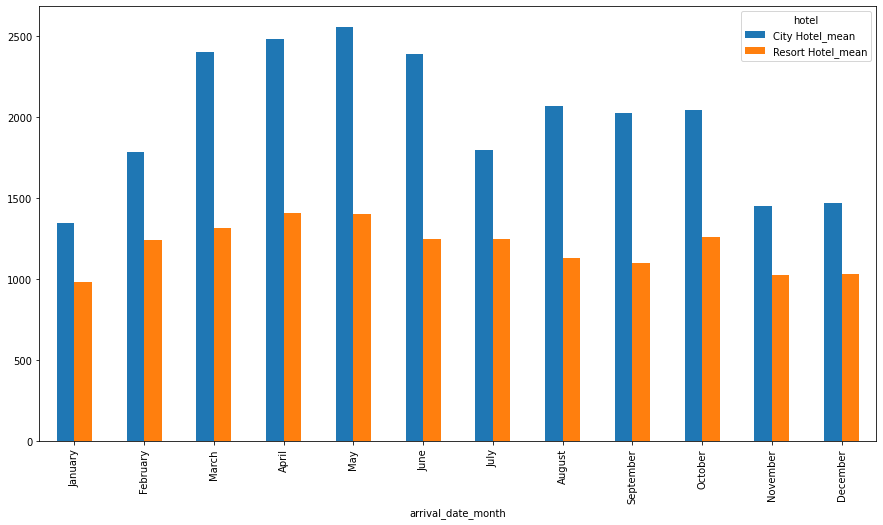

In [28]:
arrival_months.plot(kind = 'bar', y = ['City Hotel_mean','Resort Hotel_mean'], figsize=(15,8))

**INFERENCE:** 

City hotel was more booked from the month march to june and maximum booked in the month of may, whereas Resort hotel was more booked in the month April, may, october and maximum booked in April. 

In [29]:
# Requried parking space
parking_space = pd.crosstab(hotels['required_car_parking_spaces'],hotels['hotel'])
parking_space['City Hotel'] = parking_space['City Hotel'].apply(lambda x: round((x/parking_space['City Hotel'].sum())*100,2))
parking_space['Resort Hotel'] = parking_space['Resort Hotel'].apply(lambda x: round((x/parking_space['Resort Hotel'].sum())*100,2))
parking_space

hotel,City Hotel,Resort Hotel
required_car_parking_spaces,,
0,96.43,83.92
1,3.56,16.00
2,0.00,0.07
3,0.00,0.00
8,0.00,0.01


Text(0, 0.5, 'percentage of car parking requriment')

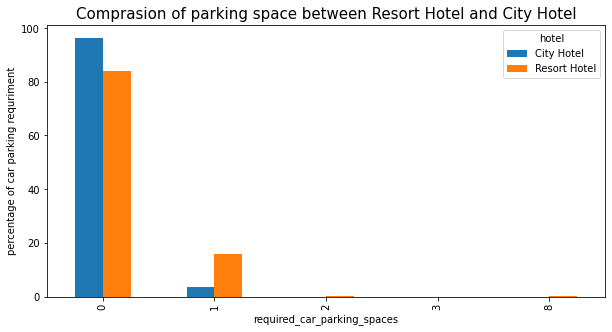

In [30]:
parking_space.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize = (10,5))
plt.title('Comprasion of parking space between Resort Hotel and City Hotel',fontsize = 15)
plt.ylabel('percentage of car parking requriment',fontsize = 10)

**INFERENCE:**

Mostly City hotels does not required any parking space, only 2.5% of guest in city hotel needs 1 parking space. For resort hotel these percentage increases as about 13.5% of guest requried 1 or more parking space.
Car parking requirements are more for resort hotels, so they must work on their parking facilities

In [31]:
Hotels_stay = hotels.groupby(['day_stay','hotel'])['day_stay'].count().unstack()
Hotels_stay.fillna(0, inplace = True)
Hotels_stay.head()

hotel,City Hotel,Resort Hotel
day_stay,,
0,287.0,358.0
1,9940.0,6743.0
2,10315.0,4656.0
3,13032.0,3958.0
4,9352.0,3557.0


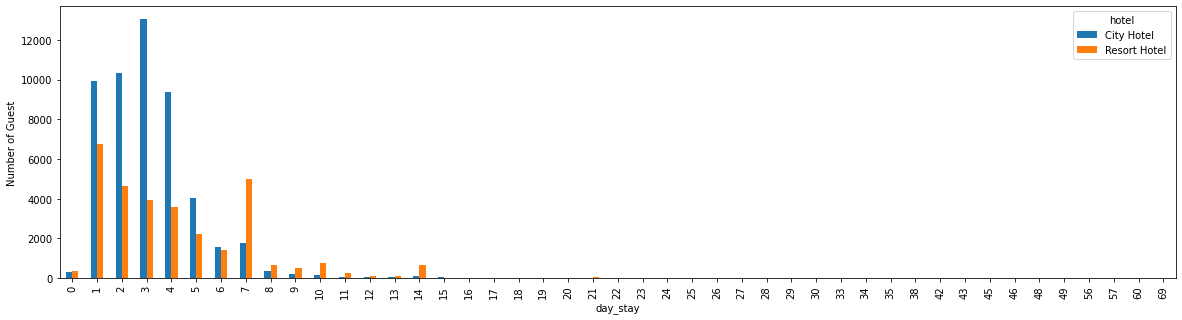

In [32]:
Hotels_stay.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'],figsize =(20,5), ylabel = 'Number of Guest')

**INFERENCE:**

Tourist generally booked the resort hotel for the long term stay and city hotel for the short term stay.

In [33]:
# Most meal type prefered by guest
hotels.groupby(['hotel','meal']).count()


is_canceled  lead_time  arrival_date_year  \
hotel        meal                                                   
City Hotel   BB               39677      39677              39677   
             FB                  11         11                 11   
             HB                2494       2494               2494   
             SC                9290       9290               9290   
Resort Hotel BB               25052      25052              25052   
             FB                 281        281                281   
             HB                5269       5269               5269   
             SC                  80         80                 80   
             Undefined          452        452                452   

                        arrival_date_month  arrival_date_week_number  \
hotel        meal                                                      
City Hotel   BB                      39677                     39677   
             FB                         11                        11   
             HB                       2494                      2494   
             SC                       9290                      9290   
Resort Hotel BB                      25052                     25052   
             FB                        281                       281   
             HB                       5269                      5269   
             SC                         80                        80   
             Undefined                 452                       452   

                        arrival_date_day_of_month  stays_in_weekend_nights  \
hotel        meal                                                            
City Hotel   BB                             39677                    39677   
             FB                                11                       11   
             HB                              2494                     2494   
             SC                              9290                     9290   
Resort Hotel BB                             25052                    25052   
             FB                               281                      281   
             HB                              5269                     5269   
             SC                                80                       80   
             Undefined                        452                      452   

                        stays_in_week_nights  adults  children  ...  agent  \
hotel        meal                                               ...          
City Hotel   BB                        39677   39677     39677  ...  39677   
             FB                           11      11        11  ...     11   
             HB                         2494    2494      2494  ...   2494   
             SC                         9290    9290      9290  ...   9290   
Resort Hotel BB                        25052   25052     25052  ...  25052   
             FB                          281     281       281  ...    281   
             HB                         5269    5269      5269  ...   5269   
             SC                           80      80        80  ...     80   
             Undefined                   452     452       452  ...    452   

                        days_in_waiting_list  customer_type    adr  \
hotel        meal                                                    
City Hotel   BB                        39677          39677  39677   
             FB                           11             11     11   
             HB                         2494           2494   2494   
             SC                         9290           9290   9290   
Resort Hotel BB                        25052          25052  25052   
             FB                          281            281    281   
             HB                         5269           5269   5269   
             SC                           80             80     80   
             Undefined                   452         

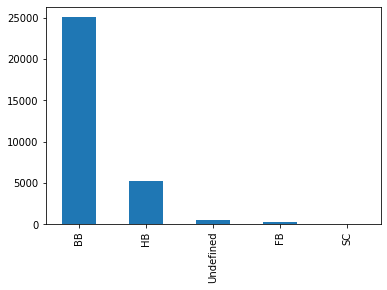

In [34]:
hotels.loc[hotels['hotel']=="Resort Hotel"]["meal"].value_counts().plot(kind = 'bar')


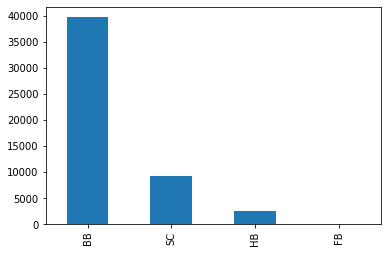

In [35]:
hotels.loc[hotels['hotel']=="City Hotel"]["meal"].value_counts().plot(kind = 'bar')

**INFERENCE:** 

- Bead and Breakfast(BB) is the most common meal prefer by the guest. In BB meal, breakfast is included in the room rent
- FB meal is only choosed in resort hotels not in city hotels


In [36]:
# Most of the hotel booked in which country
hotels['country'].unique()
max_country = pd.crosstab(hotels['country'],hotels['hotel'])
max_country['total_booking'] = max_country['City Hotel'] + max_country['Resort Hotel']
max_country = max_country.sort_values('total_booking',ascending = False).head(10)
max_country

hotel,City Hotel,Resort Hotel,total_booking
country,,,
PRT,12600,13241,25841
GBR,4347,5229,9576
FRA,7228,1335,8563
ESP,3699,3065,6764
DEU,4267,877,5144
ITA,2581,376,2957
IRL,1049,1794,2843
BEL,1645,363,2008
BRA,1530,387,1917


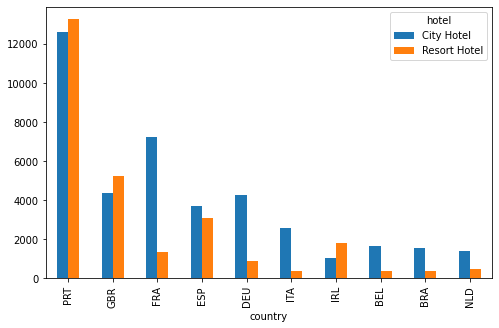

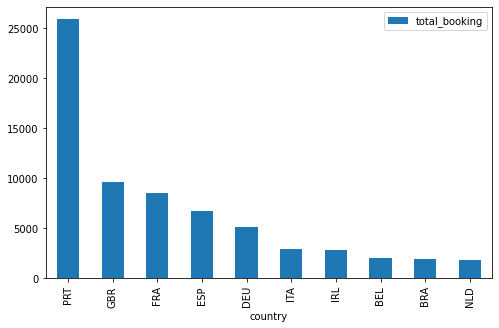

In [37]:
max_country.plot(kind = 'bar',y = ['City Hotel','Resort Hotel'],figsize = (8,5))
max_country.plot(kind = 'bar',y = 'total_booking',figsize = (8,5))

**INFERENCE:** 

Protugal has maximum hotel booking followed by Great Britian and France. In Protugal city hotel is more booked than resort hotel, wheras in Britain resort hotel is more booked than city hotel.

**IS_CANCELED**

One of the important attribute is is_canceled which shows whether a booking is canceled(1) or not(0), so we can visualize this column and can draw following conclusions:
- In which month cancelation is more
- How rate of cancelation changes year to year
- For what adr cancelation have high probability
- For what market_segment cancelation is done more

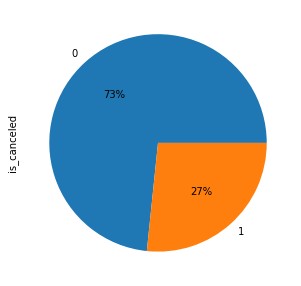

In [38]:
# canceling hotel booking
hotel_type = hotels['is_canceled'].value_counts()
hotel_type.plot(kind = 'pie',figsize = (5,5),autopct='%1.0f%%')

**INFERENCE:**

About 27% reservation in hotels is cancel after booking.

is_canceled,0,1
hotel,,
City Hotel,70.64,29.36
Resort Hotel,77.85,22.15


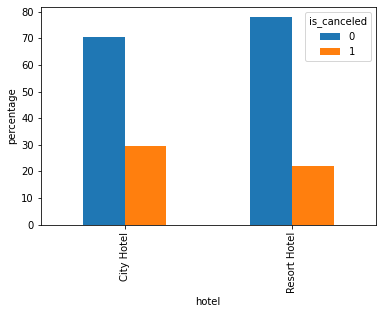

In [59]:
canceled_hotel = pd.crosstab(hotels['hotel'],hotels['is_canceled'])
total_booking = canceled_hotel[0]+canceled_hotel[1]
canceled_hotel[0] = round((canceled_hotel[0]/total_booking)*100,2)
canceled_hotel[1] = round((canceled_hotel[1]/total_booking)*100,2)
canceled_hotel.plot(kind = 'bar', ylabel = 'percentage')
canceled_hotel

**INFERENCE:**

The probability of cancalation of booking in both resort and city hotel is approx same. 29% of total booking in city hotel is cancelled whereas for resort hotel cancelation rate is 22%. 

Now we will check what are conditions when the booking is canceled and analyse the relation of column is_canceled with other columns

In [39]:
#
#in which month the tickets are cancelled the most: this is to make sure whether hotel can take an extra entry or not.
canceled_month=pd.crosstab(hotels["arrival_date_month"],hotels["is_canceled"])
canceled_month=pd.DataFrame(canceled_month,index= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )
canceled_month

is_canceled,0,1
January,3641,1016
February,4660,1391
March,5650,1781
April,5425,2345
May,5670,2242
June,5138,2132
July,6333,2796
August,6661,2926
September,4747,1502
October,5055,1548


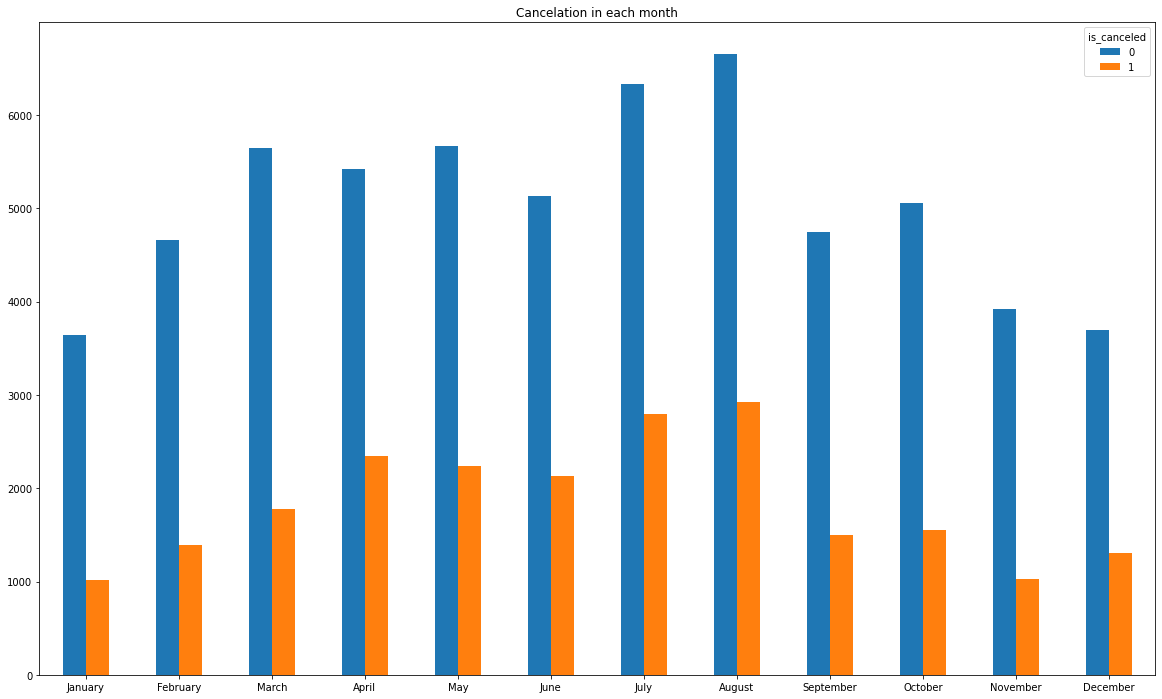

In [40]:

canceled_month.plot(kind="bar", figsize=(20,12),title="Cancelation in each month", rot=0)

**Inference:**Cancelation of bookings are more in april,may,june and august so hotels can have some extra bookings done in advance for there months so that minimum number of rooms are left empty

In [50]:
data=hotels["market_segment"].value_counts()
# to judge which agent is better 
segment_cancelled=pd.crosstab(hotels["market_segment"],hotels["is_canceled"])
segment_cancelled_percentage=segment_cancelled.copy()
total = segment_cancelled[0]+segment_cancelled[1]
segment_cancelled

is_canceled,0,1
market_segment,,
Aviation,182,45
Complementary,611,88
Corporate,3690,506
Direct,9528,1566
Groups,3176,1044
Offline TA/TO,11280,1864
Online TA,32132,16892
Undefined,0,2


In [47]:
segment_cancelled[0] = round((segment_cancelled[0]/total)*100,2)
segment_cancelled[1] = round((segment_cancelled[1]/total)*100,2)
segment_cancelled

is_canceled,0,1
market_segment,,
Aviation,80.18,19.82
Complementary,87.41,12.59
Corporate,87.94,12.06
Direct,85.88,14.12
Groups,75.26,24.74
Offline TA/TO,85.82,14.18
Online TA,65.54,34.46
Undefined,0.00,100.00


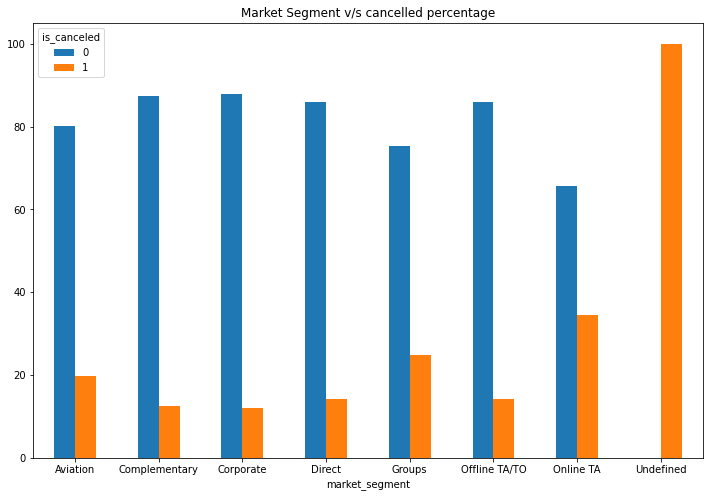

In [49]:
#
segment_cancelled.plot(kind="bar", figsize=(12,8),title="Market Segment v/s cancelled percentage", rot=0,)

**Inference**
- canceled percentage is high for undefined type of maket segment that is bookings done through online sources have 100% chances of cancelation
- cancelation percentage is also high for grouped market segment, the bookings through them are more likely to be canceled.

so hotels can have extra boookings in the case rooms are booked by one of the two segments

**LEAD TIME**

Lead time is a very important feature for hotels it tells the  number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel:

- Which lead time is most common.
- we need to analyse that if the lead time is more, than what are the chances of cancelation of booking, so this will help the hotel to take some extra bookings for that time.
- What is the  correlation between adr and lead time

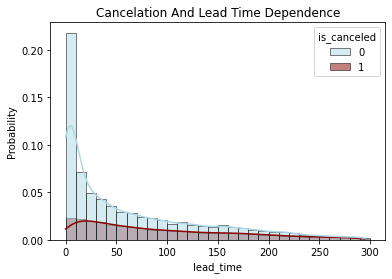

In [139]:
#
sns.histplot(data=hotels,x="lead_time",stat="probability",binwidth=10,kde=True,linewidth=0.5,hue="is_canceled",palette=['lightblue','darkred'])
plt.title("cancelation and lead time Dependence".title())
plt.show()

**Inference:**

 Lead time of 0-10 days is most common.
We notice if the lead time exceeds 50 days than there is a higher probability that the booking gets canceled

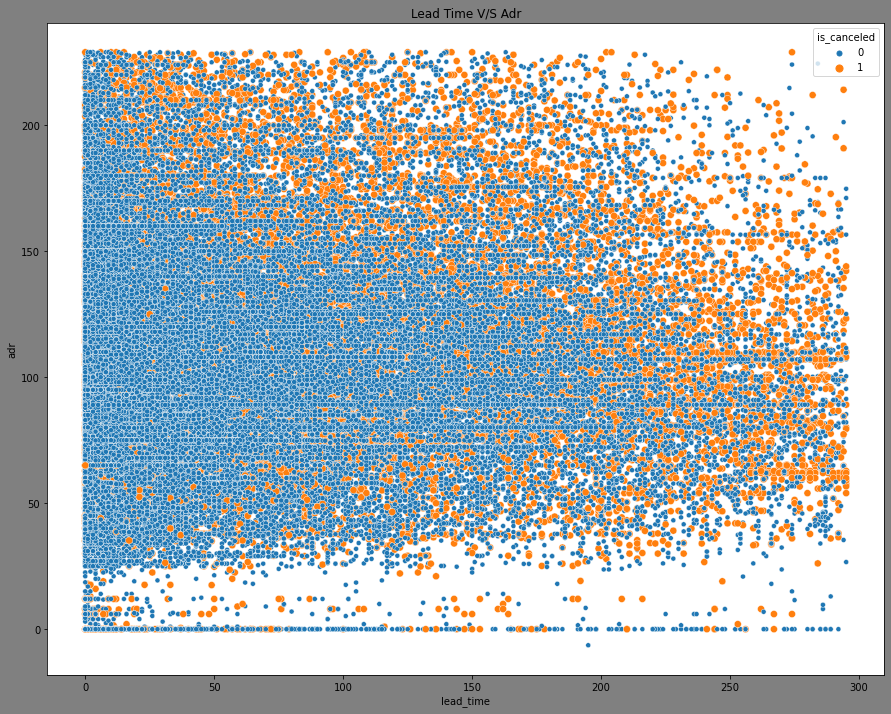

In [140]:
#what are the chances of cancelation with incresing lead time: 
plt.figure(figsize=(15,12),facecolor='grey',edgecolor='orange')
plt.title("lead time v/s adr".title())
sns.scatterplot(x="lead_time",y="adr",data=hotels,hue="is_canceled",size="is_canceled",sizes={  0:25,1:50}, alpha=1, legend="brief",y_bins=[10*i for i in range(0,20)])

**INFERENCE:**

More the avarage daily rate and more the lead time dominance the high probability of cancelation in hotel industries.

 Also if the lead time is greater than 250 days, cancelation rate is high where as for higher adr cancelation depend on lead time, i.e if the lead time is less than 10 days and adr is greater than 150 then the cancelation rate is very low.

 so basically we conclude that cancelation is not affected much by adr 

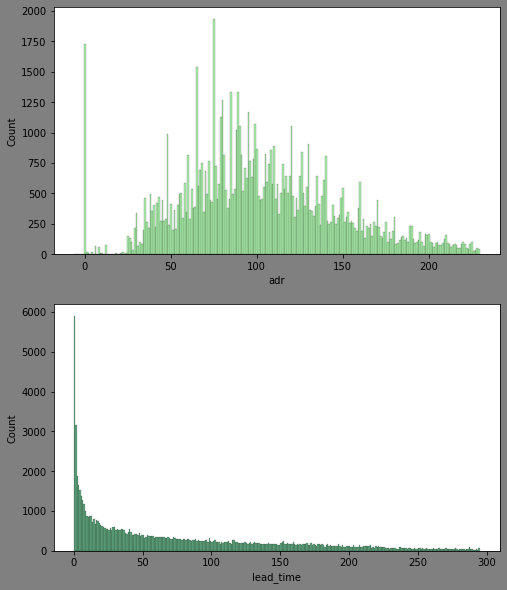

In [141]:
fig,axs=plt.subplots(2,1,figsize=(8,10),facecolor='grey',edgecolor='orange')
sns.histplot(data=hotels,binwidth=True,x="adr",color="lightgreen",ax=axs[0])
sns.histplot(data=hotels,binwidth=True,x="lead_time",color="seagreen",ax=axs[1])

**MARKET SEGMENT**

Next important attribute which is market_segment: it is a very important feature for hotels, as it is the way how guests are coming to hotels for booking so hotels must take care of those marketing segments which are proving to be very beneficial for hotels, and invest more on important marketing segments.



In [142]:
#as we have draw pie plot again again we so we prefer to write a function for it.
def make_pieplot(data,y_axis,title = None):
  '''
  input
  data: Pandas series for pie plotting
  y_axis: column of pandas dataframe
  title: String value for plot title

  output 
  Display a pie chart  
  '''
  explode_list = data.value_counts().tolist()
  explode_ = [0 if elem != max(explode_list) else 0.05 for elem in explode_list]
  dict_data=data.value_counts()
  dict_data.plot(kind = 'pie', y = y_axis, autopct='%1.2f%%', figsize =(15,10),explode = explode_, fontsize = 10,legend=True,rot=45)
  #plt.legend(title ='market_segment',loc ='lower right')
  plt.title(title,bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)

Online TA        49024
Offline TA/TO    13144
Direct           11094
Groups            4220
Corporate         4196
Complementary      699
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

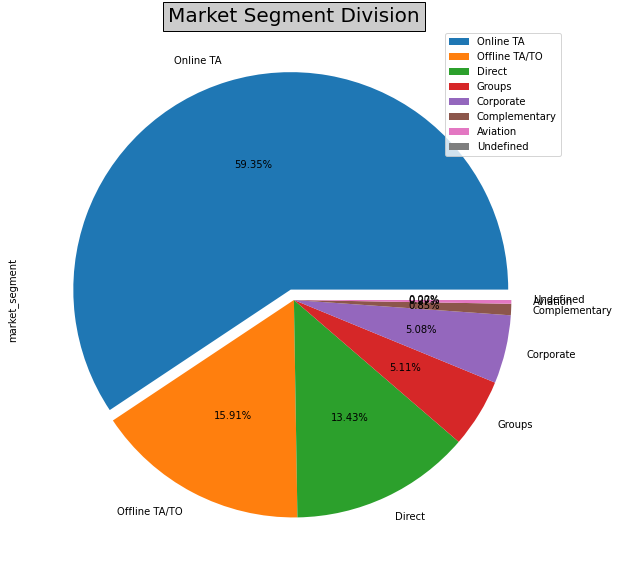

In [143]:
#
make_pieplot(hotels["market_segment"],"market_segment","Market Segment Division")
hotels["market_segment"].value_counts()

**Inference** Market_segment of onlineTA is used for nearly 50% of bookings of hotels, so hotels must work on their online adds and must register their hotel in popular onlinen Travel agency for increasing the number of bookings they are receiving

In [144]:
months_list=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [145]:
segment_month=pd.crosstab(hotels["arrival_date_month"],hotels["market_segment"])
segment_month=pd.DataFrame(segment_month,index= months_list )

In [146]:
segment_month_2015=pd.crosstab(hotels.loc[hotels["arrival_date_year"]==2015]["arrival_date_month"],hotels.loc[hotels["arrival_date_year"]==2015]["market_segment"])
segment_month_2015=pd.DataFrame(segment_month_2015,index= months_list )

segment_month_2016=pd.crosstab(hotels.loc[hotels["arrival_date_year"]==2016]["arrival_date_month"],hotels.loc[hotels["arrival_date_year"]==2016]["market_segment"])
segment_month_2016=pd.DataFrame(segment_month_2016,index= months_list )

segment_month_2017=pd.crosstab(hotels.loc[hotels["arrival_date_year"]==2017]["arrival_date_month"],hotels.loc[hotels["arrival_date_year"]==2017]["market_segment"])
segment_month_2017=pd.DataFrame(segment_month_2017,index= months_list )

In [147]:
#
segment_month.columns

Index(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
       'Offline TA/TO', 'Online TA', 'Undefined'],
      dtype='object', name='market_segment')

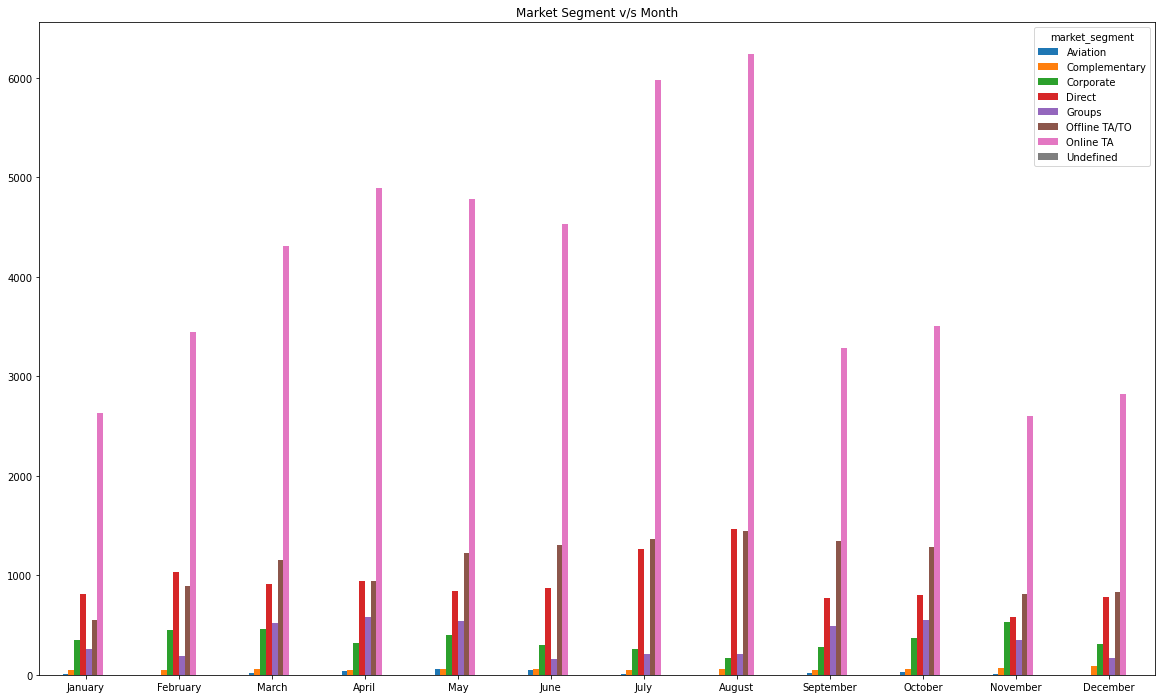

In [148]:
#
#ax=plt.figure(figsize=(8,6),facecolor='grey',edgecolor='orange')
segment_month.plot(kind="bar", figsize=(20,12),title="Market Segment v/s Month", rot=0)

**Inference:**
- number bookings are less in months of january, february, september, october, november, december, so the guests can easily get available rooms in hotels during these months.

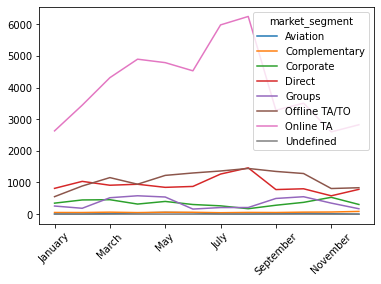

In [149]:
segment_month.plot(kind="line",rot=45)
#plt.xticks([2015,2016,2017])

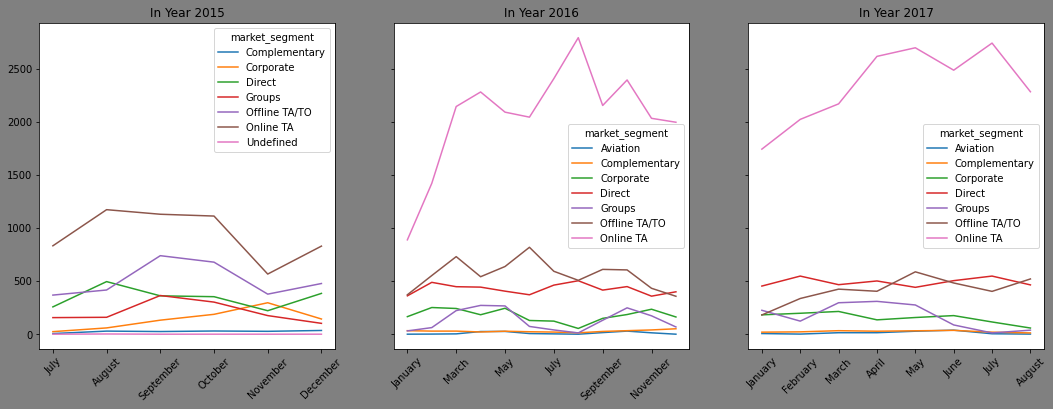

In [150]:
fig,axs=plt.subplots(1,3,figsize=(18,6),facecolor='grey',edgecolor='orange',sharey=True)
segment_month_2015.plot(kind="line",rot=45,ax=axs[0],title="In Year 2015")
segment_month_2016.plot(kind="line",rot=45,ax=axs[1],title="In Year 2016")
segment_month_2017.plot(kind="line",rot=45,ax=axs[2],title="In Year 2017")

In [151]:
segment_year=pd.crosstab(hotels["arrival_date_year"],hotels["market_segment"])
segment_year

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
arrival_date_year,,,,,,,,
2015,0,152,841,2071,1258,3055,5640,2
2016,121,346,2122,5100,1597,6752,24634,0
2017,106,201,1233,3923,1365,3337,18750,0


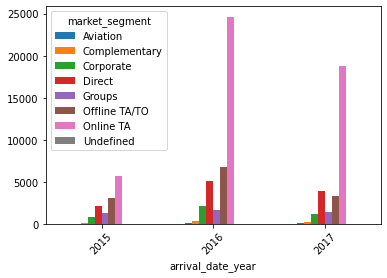

In [152]:

segment_year.plot(kind="bar",rot=45)

([<matplotlib.axis.XTick at 0x7fe2d673a5d0>,
 <a list of 3 Text major ticklabel objects>)

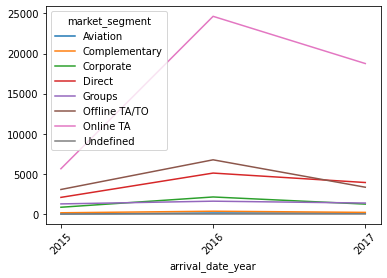

In [153]:
segment_year.plot(kind="line",rot=45)
plt.xticks([2015,2016,2017])


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

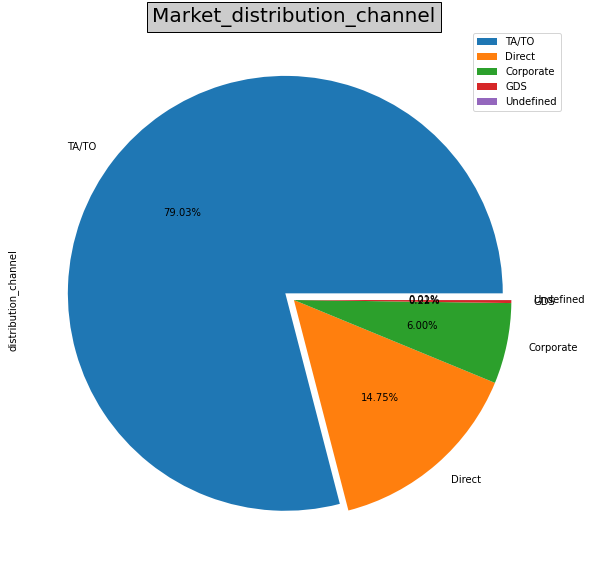

In [154]:
make_pieplot(hotels['distribution_channel'],'distribution_channel','Market_distribution_channel')
hotels['distribution_channel'].unique()

In [155]:
# Retention rate refers to the percentage of customers who continue paying for a product over a given timeframe.
# Calculate the retention rate of hotel industry based on market segment
retention_market_segment = pd.crosstab(hotels['market_segment'],hotels['is_repeated_guest'])
retention_market_segment['retention_rate'] = round((retention_market_segment[1]/(retention_market_segment[0]+retention_market_segment[1])*100),2)
retention_market_segment

is_repeated_guest,0,1,retention_rate
market_segment,,,
Aviation,164,63,27.75
Complementary,475,224,32.05
Corporate,2754,1442,34.37
Direct,10342,752,6.78
Groups,4170,50,1.18
Offline TA/TO,12878,266,2.02
Online TA,48464,560,1.14
Undefined,2,0,0.00


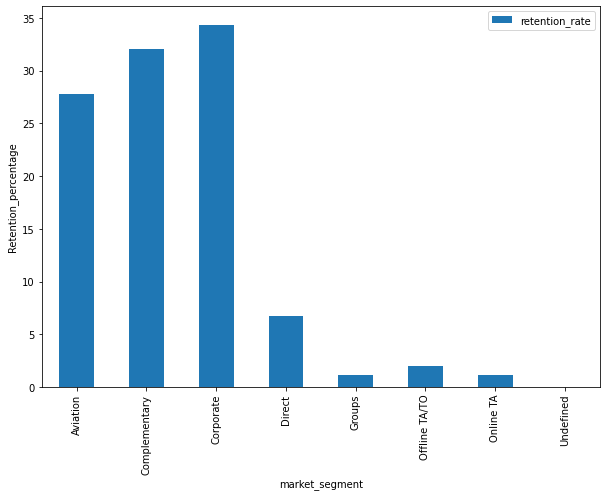

In [156]:
retention_market_segment.plot(kind = 'bar', y = 'retention_rate', figsize = (10,7), ylabel = 'Retention_percentage')

**INFERENCE:**

Complementary market segment has maximum retention rate of 31% followed by corporate 27.81% and Aviation 27%. Whereas other market segment Direct, groups, online offline travel agencies and tour organiser have very low retention rate.

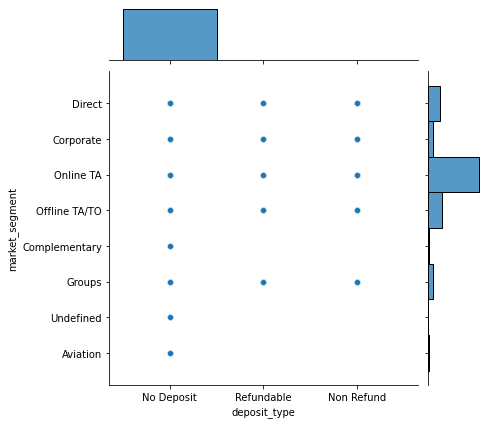

In [157]:
sns.jointplot(y="market_segment",x="deposit_type",data=hotels)

**ADR**

ADR is average daily rate, is a statistical unit that often used in logging industry. ADR tells the ability of hotels to maximize the revenue by managing the inventory

 ADR = (Room Revenue/Room Sold).

ADR is most important attributes for hotel management. Using ADR
- We analysis in which month hotels generate maximum revenue so they can provides better facilites to travellers.
- From which market segment and distribution channel hotels generate maximum profit.


In [158]:
hotel_adr = hotels.groupby('hotel')['adr'].mean()

Text(0.5, 0, 'Hotel')

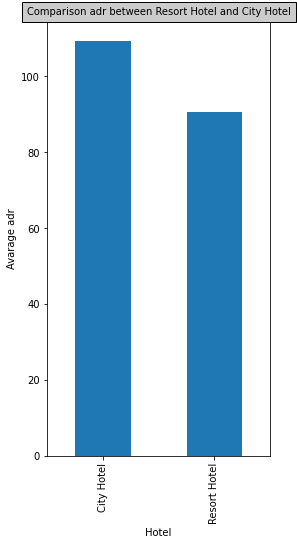

In [159]:
hotel_adr.plot(kind = 'bar',figsize =(4,8))
plt.title('Comparison adr between Resort Hotel and City Hotel',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 10)
plt.ylabel('Avarage adr')
plt.xlabel('Hotel')

**INFERENCE:**

City Hotel generates more revenue than resort hotel

In [160]:
monthly_adr =hotels.groupby(['arrival_date_month','hotel'])['adr'].mean().unstack()
monthly_adr = monthly_adr.reindex(['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthly_adr

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,84.991795,49.154921
February,88.489936,54.109722
March,93.033501,57.624614
April,115.553514,79.076797
May,125.962511,81.069854
June,121.651146,112.195749
July,117.441756,145.012432
August,121.593777,163.710873
September,118.063458,102.749123


In [161]:
monthly_adr['percentage_diff'] = round((abs(monthly_adr['City Hotel'] - monthly_adr['Resort Hotel'])/(monthly_adr['City Hotel'] + monthly_adr['Resort Hotel']))*100,2)
monthly_adr

hotel,City Hotel,Resort Hotel,percentage_diff
arrival_date_month,,,
January,84.991795,49.154921,26.71
February,88.489936,54.109722,24.11
March,93.033501,57.624614,23.50
April,115.553514,79.076797,18.74
May,125.962511,81.069854,21.68
June,121.651146,112.195749,4.04
July,117.441756,145.012432,10.50
August,121.593777,163.710873,14.76
September,118.063458,102.749123,6.94


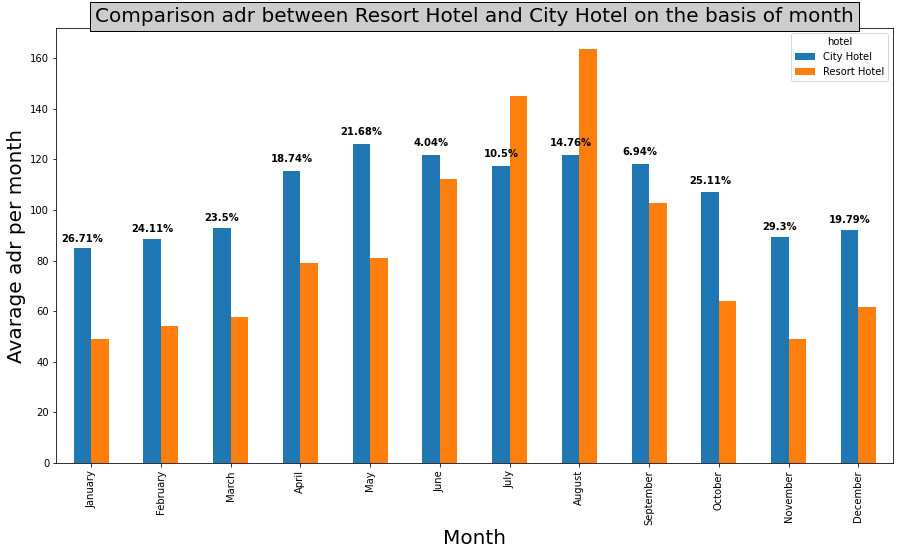

In [162]:
monthly_adr_graph = monthly_adr.plot(kind = 'bar', y = ['City Hotel','Resort Hotel'], figsize =(15,8))
plt.title('Comparison adr between Resort Hotel and City Hotel on the basis of month',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('Avarage adr per month',fontsize = 20)
plt.xlabel('Month',fontsize = 20)

i = 0
for p in monthly_adr_graph.patches[0:12]:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  plt.text(x+width/2, y+height*1.03,str(monthly_adr.percentage_diff[i])+'%',ha='center',weight='bold')
  i+=1
plt.show()


**INFERENCE:**

City hotel generally collect 20-30% more revenue from the resort hotel in the month of january, february, march, april, may, october, november and december. Resort hotel revenue start increases in the month of june to september and maximum revenue collected in the month of august which is 16.69% greater than the city hotel. 

In [163]:
hotels['market_segment'].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

**INFERENCE:**

Market segment allow hotels to target or promote it inventory to different consumer groups.

In [164]:
market_segment_adr = hotels.groupby('market_segment')['adr'].mean()
explode_list = market_segment_adr.tolist()
market_segment_adr

market_segment
Aviation         100.170396
Complementary      3.016552
Corporate         67.935784
Direct           108.629376
Groups            74.296021
Offline TA/TO     80.463736
Online TA        113.369265
Undefined         15.000000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

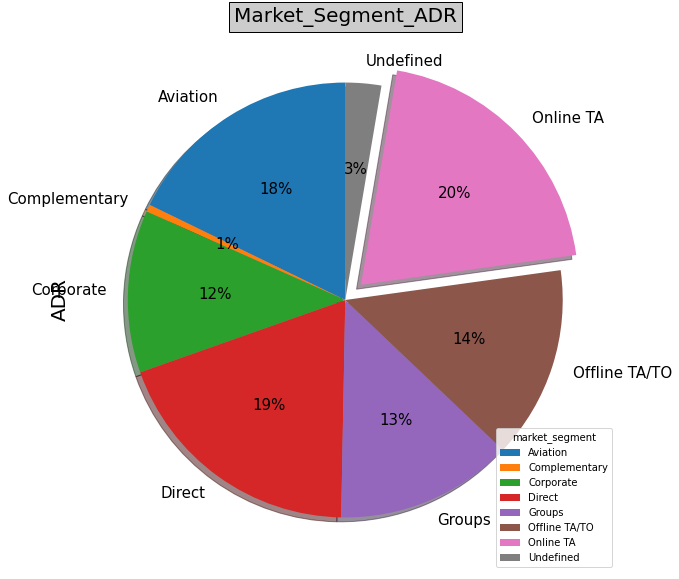

In [165]:
# Wants to know which market segment generates more revenue
explode = [0 if elem != max(explode_list) else 0.1 for elem in explode_list]
market_segment_adr.plot(kind = 'pie', y = 'market_segment', autopct='%1.0f%%', figsize =(15,10),explode = explode, shadow = True,startangle = 90, fontsize = 15)
plt.legend(title ='market_segment',loc ='lower right')
plt.title('Market_Segment_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

**INFERENCE:**

About 37% of revenue generated by the hotels from the online travel agency and direct market segment. 

In [166]:
hotels['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [167]:
distribution_channel_adr = hotels.groupby('distribution_channel')['adr'].mean()
distribution_list = distribution_channel_adr.tolist()
distribution_channel_adr

distribution_channel
Corporate     68.405607
Direct       101.636120
GDS          120.317845
TA/TO        104.849098
Undefined     46.240000
Name: adr, dtype: float64

Text(0, 0.5, 'ADR')

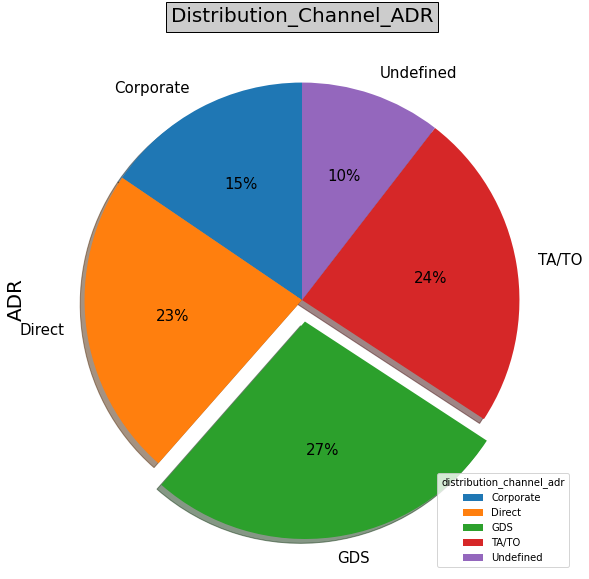

In [168]:
# Wants to know which market segment generates more revenue
expolde_1 = [0 if elem != max(distribution_list) else 0.1 for elem in distribution_list]
distribution_channel_adr.plot(kind = 'pie', y = 'distribution_channel', autopct='%1.0f%%', figsize =(15,10),explode = expolde_1, shadow = True,startangle = 90,fontsize = 15)
plt.legend(title ='distribution_channel_adr',loc ='lower right')
plt.title('Distribution_Channel_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

**INFERENCE:**

From global distribution system(GDS) channel hotels generate maximum profit, followed by travel agencies and tour organiser

In [169]:

hotels['total_guest'].unique()

array([ 1.,  2.,  3.,  4.,  5., 12.,  0.])

In [170]:
guest_number = hotels.loc[:,['adr','total_guest']]
guest_wise_adr = guest_number.groupby('total_guest')['adr'].mean()

Text(0.5, 0, 'Number_of_guest')

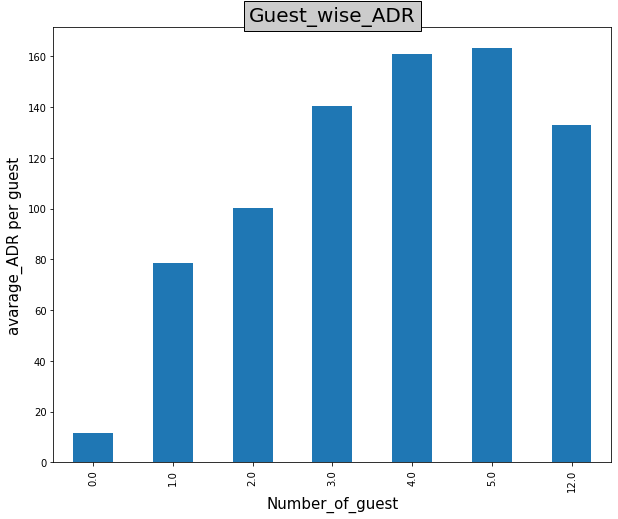

In [171]:
guest_wise_adr.plot(kind = 'bar',figsize = (10,8))
plt.title('Guest_wise_ADR',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('avarage_ADR per guest', fontsize = 15)
plt.xlabel('Number_of_guest',fontsize = 15)

**INFERENCE:**

Number of guest leads to increase the ADR in hotels industry.

Here 0 represent that the number of guest who booked a hotel room but not check in.

Text(0, 0.5, 'ADR')

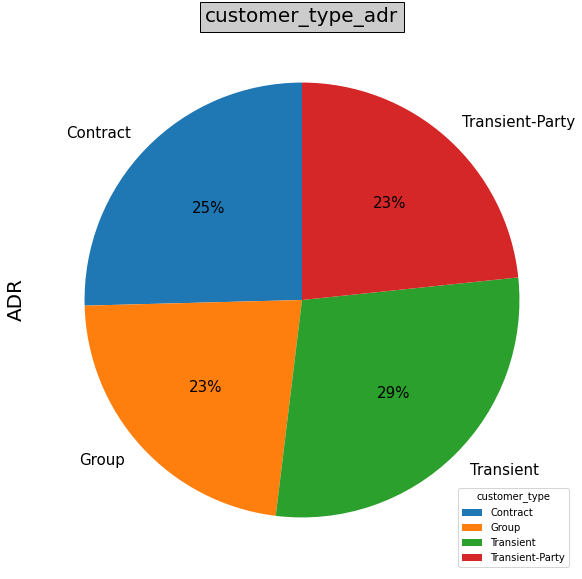

In [172]:
customer_type_adr = hotels.groupby('customer_type')['adr'].mean()
customer_type_adr.plot(kind = 'pie', y = 'customer_type', autopct='%1.0f%%', figsize =(15,10),explode = None,startangle = 90,fontsize = 15)
plt.legend(title ='customer_type',loc ='lower right')
plt.title('customer_type_adr',bbox={'facecolor':'0.8', 'pad':5}, fontsize = 20)
plt.ylabel('ADR',fontsize = 20)

In [173]:
#
Hotels_stay = hotels.groupby(['day_stay','hotel'])['day_stay'].count().unstack()
Hotels_stay.fillna(0, inplace = True)
Hotels_stay.head()

hotel,City Hotel,Resort Hotel
day_stay,,
0,287.0,358.0
1,9940.0,6743.0
2,10315.0,4656.0
3,13032.0,3958.0
4,9352.0,3557.0


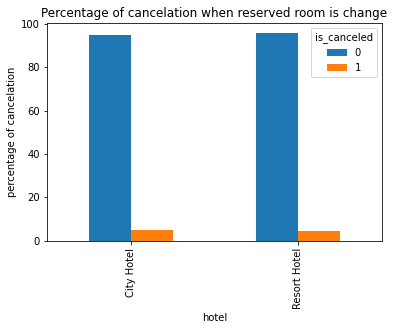

In [174]:
changed_room_type = hotels.loc[hotels['reserved_room_type'] != hotels['assigned_room_type'],['hotel','is_canceled','reserved_room_type','assigned_room_type']]
A = pd.crosstab(changed_room_type['hotel'],changed_room_type['is_canceled'])
total = A[0]+A[1]
A[0]= round((A[0]/total)*100,2)
A[1]= round((A[1]/total)*100,2)
A.plot(kind = 'bar', title = 'Percentage of cancelation when reserved room is change', ylabel = 'percentage of cancelation')


**INFERENCE:**

Cancelation rate on changing reserved room is very low in both city and resort hotels. Its approx 5% in both types of hotels

###Some other important visualisations
Others features like agents, deposite type, type of reserved room and is_repeated_guest are also very important and we can draw some useful conclusions from them. 

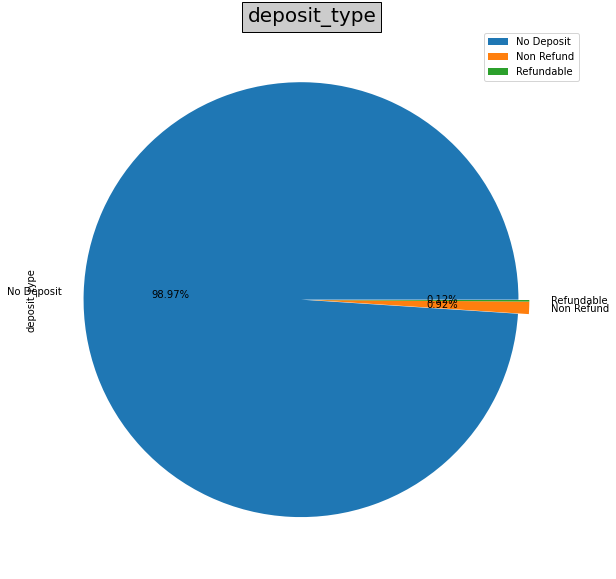

In [175]:

make_pieplot(hotels["deposit_type"],"deposit_type","deposit_type")

**Inference:** Most of the hotels chooses no deposite type 

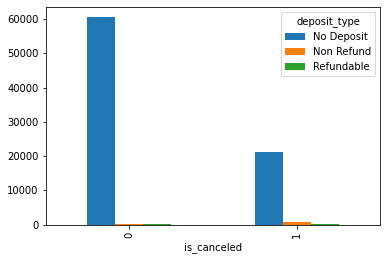

In [176]:
#In which deposite type tickets are canceled more
deposite_canceled=pd.crosstab(hotels["is_canceled"],hotels["deposit_type"])
deposite_canceled.plot(kind="bar")

**Inference:** the deposite type of no deposite has less percentage of cancelation compared to its non canceled booking percentage

In [177]:
agents=hotels["agent"].value_counts()
top_agents=np.array(agents.iloc[0:10].index,dtype="int")
agents_notreq=np.array(agents[agents<=3].index,dtype="int")    #we do not require agents who are  not very active
print(f"top agents ids are: {top_agents}\nids of agents that are not very active: {agents_notreq}")

top agents ids are: [  9   0 240   7  14 250 241  28   8   1]
ids of agents that are not very active: [420 355 335 302 535 258 167  53 321  25 391 283 438 323 484 414 211  64
 476 371 331 454 269 162 461 179 475 303  55 235  60 227 107 384  41 469
 182 135  61 358 122 346  59 451 265 295 304 294  93 370 397 289 299 197
  73 450 444 408 388 453 432 480 416 433 285 282 427 333 406 367 352 257
 301 431  54 114 446 472 291 483 497 300 280 144 278 247 267 232 216 213
 158  70 165 106 117  90 510 337 449]


**Inference:** Hotels must hier the top agents who brings more guests to hotels, and can replace the agents who are not hardworking and dont bring much guests to hotel.

In [178]:
#reserved room : to check which room is demanded most
demanded_room=hotels["reserved_room_type"].value_counts()
demanded_room

A    54493
D    16722
E     5525
F     2338
G     1429
B      941
C      736
H      410
L        6
P        6
Name: reserved_room_type, dtype: int64

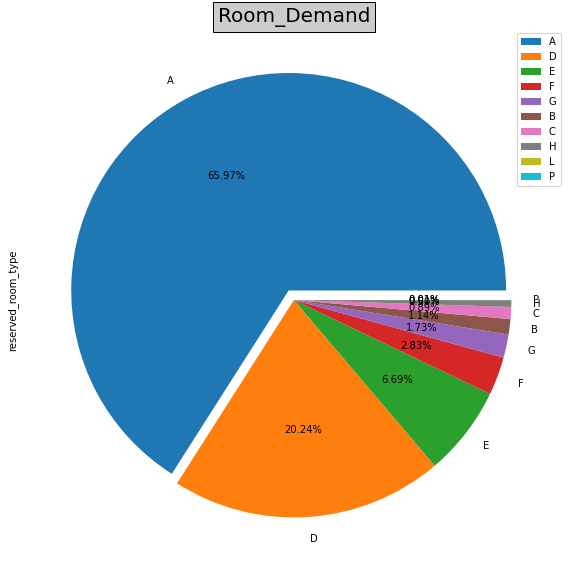

In [179]:
make_pieplot(hotels["reserved_room_type"],"reserved_room_type",'Room_Demand')

**Inference:**The most demanded room type is A, so hotels must have  more A types of rooms